### **EDA-3. Проектирование признаков**

#### **I. Введение**

В этом модуле мы поговорим об ещё одном направлении разведывательного анализа данных - **проектировании признаков (Feature Engineering).** Этот процесс также называют **конструированием признаков или разработкой признаков.** Все эти термины описывают процесс создания признаков, которые нужны для обучения модели.

*Но мы же уже собрали данные на этапе сбора данных и подготовили данные на этапе очистки. Для чего повторно создавать части в EDA?*

Как мы выяснили в предыдущих модулях, бывает недостаточно данных, собранных после этапа формирования проблемы. Данные могут быть представлены в «неподобающем» для обучения виде, например в формате даты или времени, большого текста. 

**Пример:** При прогнозировании дефолта клиента банка для создания прогнозной модели очень важно иметь информацию о дате выдачи кредита, плановой и действительной датах погашения. Эти даты дают нам представление о характере погашения кредита: был он выплачен вовремя или раньше срока, с просрочкой. 

В отличие от человека, модель машинного обучения не может проанализировать эти даты. А вот информация о просрочке (разница между плановой и фактической датой погашения) представлена в числовом формате и может сообщить некую информацию модели. Число, равное или меньше **0,** говорит о клиенте как о благонадёжном заёмщике; число больше **0 -** характеризует заёмщика как должника. Такое конструирование признаков помогает дата-сайентисту не утратить часть данных, а также представить их в более «выгодном» свете.

В знакомой нам задаче винных обзоров информация о вкусовых качествах вина также может оказаться важной при его оценке, но не может быть передана в модель машинного обучения, так как этот признак - сплошной текст. Однако мы можем вычленить из текста информацию о положительной или отрицательной оценке вина, превратив её в признаки. Такой признак, скорее всего, оказался бы важным в определении качественных вин. Определить его значимость мы сможем только на этапе отбора признаков, который мы также будем изучать в модулях *EDA*.

Избавляться от перечисленных выше данных было бы неправильно, ведь мы можем лишиться части потенциально важной информации. Проектирование признаков как раз занимается преобразованием такой информации в признаки для будущей модели машинного обучения. 

На этапе проектирования признаков специалисты по данным преследуют такие же цели, как на этапе сбора данных - сконструировать как можно больше признаков, чтобы далее отобрать из них лучшие.

Прежде чем мы приступим к изучению нового материала, необходимо ответить на несколько вопросов.


**1.** В разведывательном анализе данных Feature Engineering - это …

* *конструирование признаков*
* *проектирование признаков*
* *создание признаков*

**2.** Проектирование признаков необходимо для …

* *очистки признаков*

#### **II. Создание признаков**

**Проектирование признаков -** самый творческий процесс во всём цикле жизни создания модели машинного обучения. 

*Он включает в себя несколько этапов:*

* *создание признаков*;
* *преобразование признаков*;
* *отбор признаков*.

В данном модуле мы подробно познакомимся с каждым из этапов проектирования признаков. Этот юнит будет посвящён процессу создания признаков.

Мы уже знакомы с методами создания столбцов в *Pandas* из модуля *PYTHON-11. Базовые приемы работы с данными в Pandas. Юнит 2. Базовые операции со столбцами DataFrame.*

Создание признаков, **feature extraction,** часто именуемое **генерацией признаков,** - творческий процесс извлечения новых признаков путём создания признаков из существующего набора данных или путём использования дополнительной информации. 

Проектирование признаков необходимо для улучшения качества будущей модели: в процессе создания признаков появляются новые, возможно, более качественные, чем исходные.

*Новые признаки могут быть сконструированы двумя способами:*

* с помощью внешних источников данных;
* из существующего набора данных.

**Пример 1:** В колл-центрах часто используются системы автоматического подбора номеров для дозвона (рекомендация). Если клиент во время прошлого созвона сбросил трубку, то автоматическая система должна снижать рекомендацию этого номера. Клиент вряд ли ответит после того, как бросил трубку. 

В выделении этого факта нам поможет создание нового признака «сброс трубки» из информации в существующем датасете. Эта информация может быть получена из уже существующих признаков, например если время звонка составило меньше 10 секунд.

**Пример 2:** Для определения дефолтности клиента банки делают запрос в БКИ (бюро кредитных историй, которое занимается организацией, хранением и предоставлением кредитных отчётов, в которых содержатся сведения о принятых на себя обязательствах по договорам займа и кредита) с целью получения дополнительной информации по клиенту. 

Такая информация о невыплаченных долгах другим организациям может быть решающим фактором в вынесении решения по кредиту. Эту информацию можно получить с использованием внешних источников данных.

Работе с внешними источниками данных будет посвящен следующий юнит.

**Новые признаки можно сконструировать из уже существующего набора данных несколькими способами:**

* разбор категорий; 
* разбор даты и времени;
* разбор числовых признаков;
* разбор текста.

Рассмотрим эти способы на примере задачи винных обзоров. Вспомним задачу винного сомелье - научиться определять рейтинг (качество) вина по его различным характеристикам. В этом модуле для практических заданий мы будем пользоваться подготовленным и очищенным датасетом.

In [820]:
# Импортируем библиотеку Pandas
import pandas as pd

# Используем функцию filterwarnings из библиотеки warnings для отключения предупреждений
import warnings
warnings.filterwarnings('ignore')

Прочитаем подготовленный и очищенный файл с винными обзорами и выведем первые пять строк таблицы с помощью метода **head(),** чтобы убедиться в том, что всё подгрузилось верно:

In [821]:
df_wine_cleared = pd.read_csv('data/wine_cleared.csv')
df_wine_cleared.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


**1. РАЗБОР ДАТЫ И ВРЕМЕНИ**

Признаки, обозначающие дату и время, могут содержать много полезной информации. 

*Например*, в нашем датасете в названии вина можно увидеть год производства вина. Этот признак может оказаться важным для определения рейтинга вина. Однако, пока он заключен в названии вина, модель не сможет его использовать.

<img src="images/Разбор даты и времени.png">

Можно выделить год, месяц и часы в отдельные признаки: время суток, времена года и так далее. И если вы считаете, что ваш процесс зависит от времени, посвятите этому этапу как можно больше усилий.

Подробнее про создание признаков из даты и времени вы узнаете в одном из следующих юнитов.

**2. РАЗБОР ЧИСЛОВЫХ ВЕЛИЧИН**

В наборе данных очень часто встречаются числовые величины. Это могут быть вес, рост, расстояние и так далее. Вы можете преобразовывать их, создавать новые признаки, которые могут оказаться лучше исходных.

Например, в датасете винных обзоров числовым признаком является цена за бутылку вина. Вы можете округлить цену **35.363389 $** в **35 $,** избавив данные от лишней информации.

Создадим новый признак **price_round,** означающий округлённую до целого числа цену за бутылку вина:

In [822]:
# Для удобства сразу преобразуем признак в int
df_wine_cleared["price_round"] = df_wine_cleared["price"].round().astype(int)
df_wine_cleared.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65


Для таких преобразований важен контекст. В контексте вина для сомелье цена в **35 $** и **35.363389 $** одинакова. Вы делаете округление признака, чтобы модель также не сосредотачивалась на сотых. Это может помочь улучшить предсказание.

Однако такое преобразование неуместно в ситуациях, когда сотые важны. *Например*, при предсказании курса лиры стоимость валюты в **6.12 руб.** и в **6.84 руб.** - абсолютно разные ситуации. 

Помимо округления для создания новых признаков могут применяться такие популярные операции, как *логарифмирование числового признака* или *извлечение его корня*. Это подразумевает создание признаков в наиболее удобной форме для обучения модели. О необходимости таких преобразований мы узнаем далее в юните преобразования данных.

**3. РАЗБОР ТЕКСТА**

Текстовые признаки могут содержать в себе большое количество информации. *Например*, если бы наша модель умела распознавать текст, то из описания вина мы бы могли понять, какими словами сомелье чаще характеризуют качественное вино. Вы можете воспользоваться методами извлечения слов из текста, чтобы получить новые признаки.

В названии вина вы можете заметить указание года произведения вина. Чтобы узнать, влияет ли год на рейтинг вина, вам необходимо выделить год в отдельный признак.

Для того, чтобы извлечь из строки число, обозначающее год, необходимо воспользоваться **регулярными выражениями.**

**Регулярные выражения** *(regexp, или regex)* - это механизм для поиска и замены текста. Это шаблоны, которые используются для поиска соответствующей части текста.

*Например*, с помощью такого регулярного выражения **[^@ \t\r\n]+@[^@ \t\r\n]+\.[^@ \t\r\n]+** можно найти любой **e-mail** в тексте.

<img src="images/Демонстрация работы регулярного выражения для поиска email в тексте.png">

Синтаксис регулярных выражений необычен и содержит различные символы, знаки препинания, математических операций и так далее.

Реализация такого механизма существует в *Pandas* в работе со строками. Для того чтобы найти все числа в каждом значении серии, воспользуемся методом **str.findall().** Метод возвращает все совпадения с заданным шаблоном в серии *Pandas*. 

Выполним код для нахождения года вина при помощи регулярного выражения, полученный признак **year** будет выглядеть следующим образом:

In [823]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
df_wine_cleared["year"] = df_wine_cleared["title"].str.findall(regex).str.get(0)
df_wine_cleared.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012


Разберём регулярное выражение **\d{4}:**

* **\d -** класс символов, обозначает соответствие цифрам в диапазоне цифр **[0-9];**
* **{4}** в шаблоне означает искать четыре вхождения символа, указанного ранее. В нашем случае это будут четырехзначные числа.

Таким образом, **\d{4}** означает поиск четырехзначных чисел в заданной строке.

Однако при поиске числа методом **data['title'].str.findall(regex)** результатом выполнения является список найденных цифр. Поэтому необходимо извлечь первый элемент из списка найденных методом **str.get(0),** где **0 -** первый элемент в списке найденных чисел.

Используя методы работы со строками *Рandas* и регулярные выражения, можно извлечь любую информацию для новых признаков: даты, слова и выражения.

**4. РАЗБОР КАТЕГОРИЙ**

В наборе данных винных обзоров самая популярная страна-производитель вина - *США*. Возможно, это не случайность, и факт производства в США влияет на рейтинг вина. Выделим этот факт.

Мы можем создать новый бинарный признак **is_usa** и присвоить ему **1** в случае, если вино произведено в *США*, иначе - **0.**

In [824]:
df_wine_cleared["is_usa"] = df_wine_cleared["country"].apply(lambda x: 1 if x == "US" else 0)
df_wine_cleared.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012,1


В наборе данных также есть ещё две страны, которые являются не менее популярными производителями вина.

**1.** Выберем из списка две самых популярных (помимо США) страны, производящих вино.

In [825]:
# Найдем самые популярные страны
popular_countries = df_wine_cleared["country"].value_counts()
print(popular_countries)

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14


Возможно, производство вина в этих странах также влияет на рейтинг. Давайте создадим для них бинарные признаки.

**2.** Создадим бинарные признаки **is_france, is_italy** наподобие признака **is_usa.**

In [826]:
df_wine_cleared["is_france"] = df_wine_cleared["country"].apply(lambda x: 1 if x == "France" else 0)
df_wine_cleared["is_france"].sum()

22093

In [827]:
df_wine_cleared["is_italy"] = df_wine_cleared["country"].apply(lambda x: 1 if x == "Italy" else 0)
df_wine_cleared["is_italy"].sum()

19540

Мы можем углубиться в разбор категориальных признаков - создать бинарный признак для каждого значения страны. Можно не делать это вручную: существуют специальные способы кодирования. Об особенностях этого подхода мы поговорим в юните *Кодирование данных*.

Также мы можем создавать некие бизнес-правила, гипотезы. О правилах их построения мы узнаем далее в материалах, посвящённых статистическим гипотезам. 

Попробуем вывести правило в определении качества вина: старые вина лучше молодых. В нашем датасете **40 %** вин старше **2010 года.** 

**3.** Создадим новый бинарный признак **old_wine,** где значение **1** будет обозначать, что вино старше **2010 года.**

In [828]:
# Преобразуем признак year в объект datetime для удобного сравнения дат
df_wine_cleared["year"] = pd.to_datetime(df_wine_cleared["year"], errors="coerce")

# Для сравнения используем год, заполняем значения признака old_wine, где год вина меньше 2010
df_wine_cleared["old_wine"] = df_wine_cleared["year"].apply(lambda x: 1 if x.year < 2010 else 0)
df_wine_cleared["old_wine"].sum()

39765

Итак, разбор категориальных признаков может быть использован для выделения самых популярных, уникальных категорий в отдельный признак.

Таким образом, разбор категорий, даты и времени, числовых признаков, текста применяются для создания новых, более сильных признаков для обучения.

Выполним следующие задания для закрепления изученного материала.

**4.** **Создание признаков -** это …

* процесс добавления новых признаков на основе исходного набора данных или из внешних источников данных

**5.** **Проектирование признаков** включает в себя … 

* *создание признаков*;
* *преобразование признаков*;
* *отбор признаков*.

**6.** Сопоставим этапы создания признаков и используемые приёмы.

**1.** извлечение бинарного признака для значения категории - это ...

* разбор категорий

**2.** использование логарифмирования, округления - это ...

* разбор числовых значений

**3.** извлечение количества дней из разницы дат - это ...

* разбор даты и времени

**4.** использование регулярных выражений - это ...

* разбор текста

**5.** работа со строковыми методами *Pandas* - это ...

* разбор текста

**7.** СоздаДИМ новый признак *locality* из признака *title*, который будет обозначать название *долины/местности производства вина*.

*Например*, в названии вина *Rainstorm 2013 Pinot Gris (Willamette Valley) locality* будет *Willamette Valley*. В названии *Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra) - Navarra*.

Ответом на это задание является получившееся регулярное выражение и код преобразования.

In [829]:
regex = '\((.*?)\)'
df_wine_cleared["locality"] = df_wine_cleared["title"].str.findall(regex).str.get(0)
df_wine_cleared.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,35,2013-01-01,0,0,1,0,Etna
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,13,2013-01-01,1,0,0,0,Lake Michigan Shore
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,65,2012-01-01,1,0,0,0,Willamette Valley


В этом юните мы рассмотрели основные подходы к созданию признаков из существующего набора данных. Далее мы узнаем, как создавать новые признаки из внешних источников данных. 

#### **III. Создание признаков. Внешние источники данных**

В машинном обучении часто используют внешние источники данных для создания признаков. Это может быть необходимо для получения совершенно новой информации, которая может быть важнее исходных признаков.

**Внешние источники данных -** дополнительные источники информации, использующиеся для обогащения датасета. Существует два типа внешних источников данных - **открытые** и **закрытые.**

**Открытые источники** доступны всем пользователям интернета. Их предоставляют такие источники, как Федеральная служба государственной статистики, Федеральная налоговая служба, Центральный банк, Википедия и так далее.

**Пример:** Для определения платежеспособности клиента банки часто используют данные из Федеральной службы государственной статистики, чтобы получить информацию о занятости клиента, размере оплаты труда для конкретного региона, в котором проживает клиент. Эта информация может оказаться важной в определении платёжеспособности клиента.

Компания, занимающаяся построением предсказательной модели, может запросить данные в качестве услуги *(data as a service)* у компании-провайдера данных. Это случай обогащения датасета закрытыми данными. Источниками закрытых данных являются сотовые операторы, БКИ, Госуслуги, ФССП (Федеральная служба судебных приставов) и так далее.

**Пример:** Коллекторская компания по договорённости с Федеральной службой судебных приставов дополнительно получает информацию об исполнительных производствах и других судебных процессах по своим клиентам. Это помогает обеспечивать более качественные взыскания.

Для получения информации из внешних источников данных специалисты по данным могут скачивать информацию с сайтов, парсить их и взаимодействовать с внешними сервисами по API.

*Например*, на сайте Федеральной службы государственной статистики (Росстат) вы можете скачать данные об общем приросте населения областей РФ в формате *.XLSX, .CSV, .HTML, .DOCX.* Мы уже работали с файлами различных форматов в модуле *PYTHON-16. Как выгружать данные из файлов разных форматов.*

<img src="images/Витрина статистических данных на сайте Росстата.png">

Также специалисты по данным используют *API* или *парсинг* для получения дополнительной информации. Мы уже научились *парсингу сайтов* и работе с *API* в модуле *PYTHON-17. Как получать данные из веб-источников и API.*

Дата-инженеры могут запрашивать у сотового оператора по *API* информацию о принадлежности номера телефона определённому клиенту. Такую информация можно использовать, чтобы выяснить, скрывает ли человек своё настоящее имя.

Когда данные получить необходимо, а *API* у источника данных нет, дата-инженеры прибегают к *парсингу*. 

*Например*, мы хотим в целях обучения создать модель, которая бы предсказывала стоимость автомобиля по заданным характеристикам. Из данных у нас есть только марка автомобиля и его стоимость. Произведя парсинг сайта *auto.ru*, вы сможете получить дополнительную информацию о марках автомобиля: тип кузова, габариты, расход топлива, - и понять, из каких параметров складывается цена на автомобиль.

**Внешняя информация** бывает **общая** и **профильная.**

**Общая внешняя информация -** это различные общие географические, экологические, статистические и другие данные. 

* **географические:** население страны, площадь страны, столица страны и так далее.
* **экологические:** среднегодовая температура местности, текущее время года, уровень загрязнения воздуха и так далее.
* **статистические:** доходы населения, половозрастной состав, уровень безработицы и так далее.

О*ни находятся в открытых источниках:* Росстат, Википедия и так далее.

Для доступа к ним применяется *парсинг*, скачивание и работа с файлами файлов, реже - работа по *API*.

**Профильная внешняя информация -** информация, связанная со сферой бизнеса, проблему которого необходимо решить. 

*Например*, при прогнозировании рейтинга ресторана мы можем использовать ссылки на сайт *TripAdvisor* для парсинга и получения информации о ресторанах. При рекомендации фильмов в приложении мы можем пользоваться информацией с «Кинопоиска» о фильмах. Также это могут быть запросы в сервисы - запрос в *Dadata.ru* для проверки действительности адреса. 

Для доступа к такой информации часто применяются запросы по *API*, *парсинг*, *работа с файлами*.

Давайте попробуем использовать внешние источники данных для получения информации к нашему набору данных. 

**1.** **РАБОТА С ФАЙЛАМИ**

Часто маленькие страны с небольшим количеством населения имеют узкую специализацию. *Например*, в производстве вина особенно успешны Франция, Италия, Испания, Новая Зеландия. Чтобы проверить, влияет ли на качество вина населённость, выясним информацию о населении страны, в котором была произведена бутылка вина. 

Дата-инженеры предоставили нам файл *country_population.zip* (необходимо распаковать) с данными о населении по странам. 

Давайте прочтём его:

In [830]:
df_country_population = pd.read_csv('data/country_population.csv', sep=';')
df_country_population

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


Прочитав файл, мы получили привычный нам датафрейм с полями *country* - название страны, *population* - население страны, но предположительно в файле *country_population.csv* два раза повторяется страна *China*, необходимо это проверить:

In [831]:
df_country_population[df_country_population["country"] == "China"]

,country,population
0,China,"1,411,778,724"
102,China,"7,394,700"


Да, действительно, так и есть, соответственно, необходимо удалить повторяющуюся строку с наименьшим количеством населения:

In [832]:
df_country_population = df_country_population.drop(index=102)

Проверяем результат:

In [833]:
df_country_population[df_country_population["country"] == "China"]

,country,population
0,China,"1,411,778,724"


**1.** Отлично, теперь определим каково население Италии согласно датасету *country_population* ?

In [834]:
df_country_population[df_country_population["country"] == "Italy"]

,country,population
24,Italy,"59,097,904"


Далее сопоставим значения из датасета *country_population* и страной-производителем вина. На основе значений населения из *country_population* заполним новый признак *country_population*.

Используем для этого функцию для объединения датасетов *join*. Для объединения используем аргумент *on='country'*, указывая столбец, по которому объединяем датафреймы:

In [835]:
df_wine_cleared = df_wine_cleared.join(df_country_population.set_index('country'), on='country')
df_wine_cleared.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,White Blend,Nicosia,35,2013-01-01,0,0,1,0,Etna,"59,097,904"
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,"10,347,892"
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Gris,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386"
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,Riesling,St. Julian,13,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386"
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Noir,Sweet Cheeks,65,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386"


Итак, мы получили новый признак для нашего датасета - *население страны*.

Теперь используем файл **country_area.zip** *(необходимо распаковать)* для информации о площади страны.

Прочитаем файл:

In [836]:
df_country_area = pd.read_csv('data/country_area.csv', sep=';')
df_country_area

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


Прочитав файл, мы получили привычный нам датафрейм с полями **country** - *название страны*, **area** - *площадь страны*.

**2.** Создадим новый признак *area_country -* площадь страны, аналогичный признаку *population*.

Какая площадь страны у вина под названием **Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA)) ?**

In [837]:
# Создадим новый признак area_country - площадь страны
df_country_area["area_country"] = df_country_area["area"]
df_country_area.drop(columns = df_country_area.columns[1], axis=1, inplace=True)

df_wine_cleared = df_wine_cleared.join(df_country_area.set_index('country'), on='country')
df_wine_cleared.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area_country
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,Nicosia,35,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,St. Julian,13,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386",9372610.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Sweet Cheeks,65,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0


In [838]:
# Узнаем какая площадь страны у вина под названием Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))
df_wine_cleared[df_wine_cleared["title"] == "Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))"]

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population,area_country
94,94,US,"Barrel notes are prominent, with aromas of Cre...",Grand Klasse Reserve Lawrence Vineyards,88,22.0,Washington,Columbia Valley (WA),Sean P. Sullivan,@wawinereport,...,Gård,22,2014-01-01,1,0,0,0,Columbia Valley (WA,"333,022,386",9372610.0


*Итак*, мы получили два новых признака, используя общую внешнюю информацию и навыки выгрузки данных и файлов различных форматов. Более профессиональные методы, например *парсинг*, мы будем использовать в практических проектах, чтобы получить профильную внешнюю информацию.

Внешней информации можно получить очень много. Руководствуйтесь следующими ***правилами при работе с внешними источниками данных:**

**1.** Старайтесь найти профильную информацию по вашей бизнес-проблеме. При предсказании рейтинга фильма информация об успехе режиссёра в других картинах будет полезнее, чем среднегодовая температура страны, в которой снят фильм.

**2.** Если у вас много времени и ресурсов, соберите как можно больше признаков любого качества. Чем больше данных вы сгенерируете, тем выше вероятность получить качественные признаки на этапе отбора данных.

**3.** Используйте наименее трудозатратный для вас метод поиска информации: работа с файлами, парсинг, запрос по API. Если останется время, можете попробовать другой подход.

**4.** Не уделяйте всё время разработки поиску дополнительной информации. Вам ещё будет необходимо построить модель, вывести её в продакшн - это также требует времени. 

**5.** Помните, что цикл разработки модели цикличен: при достижении неудовлетворительных результатов вы всегда сможете вернуться на любой шаг, в том числе и на шаг проектирования признаков.

В этом юните мы ознакомились с основами создания признаков, используя внешние источники данных. Далее, ответим на вопросы для закрепления материала !

**3.** **Внешние данные -** это …
* *данные из открытых источников*;
* *данные по запросу компании*;
* *статистические данные*;
* *данные с различных сайтов*.

**4** Выберем признаки, из которых можно подтянуть информацию, используя внешние источники данных:
* *ссылка на твиттер сомелье*;
* *наименование города*;
* *номер телефона*.

**5.** Выберем общие внешние данные из списка:
* *информация о столице*;
* *средняя температура местности в июле*;
* *минимальная рекомендованная цена на товар*;
* *средняя зарплата в регионах РФ в 2020 году*.

#### **IV. Создание признаков. Работа с форматом «дата-время»**

Очень часто при сборе данных для предсказательных моделей появляются признаки, выраженные датой и временем. С датой и временем вы работали в модуле *PYTHON-11. Базовые приёмы работы с данными в Pandas Юнит 3. Работа с датами в DataFrame.*

**Пример:** В рекомендательных сервисах интернет-магазинов, которые тоже используют машинное обучение, очень важно знать, когда клиент сделал последний заказ, когда клиент последний раз заходил на сайт, когда последний раз просматривал ту или иную категорию товаров на сайте. На основе этой информации модель определяет, какой товар лучше всего рекомендовать при следующем посещении сайта. Эта информация хранится в базе данных в формате даты, например строкой вида 2000-09-13 13:59:00. Признак в таком формате не может быть передан на вход модели машинного обучения.

Большинство алгоритмов машинного обучения не умеют работать с признаками в строковом представлении, поэтому такие признаки должны быть преобразованы в формат числа. Подробнее с алгоритмами машинного обучения мы познакомимся далее в модулях про машинное обучение.

Чтобы не потерять важную информацию, заключённую в формате даты и времени, необходимо преобразовать эту информацию таким образом, чтобы признак был в формате числа, а не строки. 

*Например*, дата последнего захода на сайт может быть преобразована в количество дней с момента последнего входа на сайт, то есть результат разницы между текущей датой и датой последнего захода на сайт:

**текущая дата - дата с последнего захода на сайт = количество дней с момента последнего посещения сайта**

Также мы можем посчитать количество минут, секунд, месяцев, лет с момента какой-либо даты. Это зависит от контекста:

* минуты и секунды актуальны для событий, часто меняющихся во времени;
* месяцы и года - для событий, которые происходят реже. *Например*, вычисление возраста из даты (лет), подсчёт стажа на последнем месте работы (месяцев, лет).

Помимо разницы в датах мы можем подмечать, в какое время суток произошло некое событие: *день, вечер, ночь.*

Также мы можем выделять из даты месяц или время года некоего события. Так мы сможем выяснить, *например*, влияет ли время года на покупку бытовой техники на сайте компании.

Создавая новые признаки из строковых признаков, мы также можем получить признаки в **строковом представлении** как в случае со временем суток. Такой признак мы по-прежнему не можем передать в модель. Но можно передать его в виде: **1 -** *утро*, **2 -** *день*, **3 -** *вечер*, **4 -** *ночь*. Этот приём часто используется дата-сайентистами для оцифровки некоторых категорий и называется **кодированием**. С кодированием признаков мы познакомимся в следующем юните.

Мы рассмотрели самые популярные идеи для создания признаков из даты, но вы можете придумать гораздо больше вариантов, так как **генерация признаков -** это очень творческий процесс, ограниченный только фантазией и временем автора.

Давайте теперь приступим к практическим заданиям. В следующих заданиях мы будем использовать срез базы данных из колл-центра. Компания хочет предсказывать, какому из клиентов стоит звонить сегодня, а какому - нет.

Давайте рассмотрим, из каких признаков состоит срез данных:

* **client_id -** *идентификатор клиента в базе*;
* **agent_date -** *время соединения с агентом*;
* **created_at -** *время соединения с клиентом (начало разговора)*;
* **end_date -** *время окончания соединения с клиентом (конец разговора)*.

Прочитаем данные:

In [839]:
# Инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ["client_id",  "agent_date", "created_at" , "end_date"])

# Преобразовываем признаки в формат datetime для удобной работы
calls["agent_date"] = pd.to_datetime(calls["agent_date"])
calls["created_at"] = pd.to_datetime(calls["created_at"])
calls["end_date"] = pd.to_datetime(calls["end_date"])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


Все признаки в наборе данных, за исключением номера клиента, представляют собой дату и время. Давайте создадим несколько признаков из этих данных.

Мы можем посчитать, сколько примерно длилось время разговора клиента и сотрудника компании **- длительность разговора.**

Подсчитаем разницу между датой и временем начала разговора с клиентом и датой и временем окончания звонка.

In [840]:
calls["duration"] = (calls["end_date"] - calls["created_at"]).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


Таким образом мы получили новый признак **duration -** *длительность разговора в секундах*.

Давайте создадим ещё несколько признаков на основе существующих.

**6.** Подсчитаем, сколько секунд тратят сотрудники компании на дозвон клиенту. Результат запишем в новый признак *time_connection*.

In [841]:
calls["time_connection"] = (calls["created_at"] - calls["agent_date"]).dt.seconds
calls["time_connection"].sum()

89

Факт дозвона очень важен для компании, ведь если до клиента не удалось дозвониться, необходимо звонить ещё. 

**7.** Создадим новый признак **is_connection -** *факт соединения с клиентом*. Признак будет равен **1** в случае, если разговор состоялся и продлился больше **10** секунд, иначе - **0.**

In [842]:
calls.loc[(calls["end_date"] - calls["created_at"]).dt.seconds > 10, "is_connection"] = 1
calls["is_connection"].sum()           

7.0

**8.** Создадим признак **time_diff -** *разницу в секундах между началом звонка(не разговора) и его окончанием*.

In [843]:
calls["time_diff"] = (calls["end_date"] - calls["agent_date"]).dt.seconds
calls["time_diff"].sum()

1144

Итак, мы получили четыре новых признака для нашего набора данных: **duration, time_connection, is_connection, time_diff.** После генерации признаков из дат исходные признаки **agent_date, created_at, end_date** нам больше не нужны - передать на вход модели мы им не сможем, так как большинство моделей машинного обучения умеют работать только с числами, даты и текст ей недоступны, поэтому удалим их:

In [844]:
calls = calls.drop(columns=["agent_date", "created_at" , "end_date"], axis=1)
calls

,client_id,duration,time_connection,is_connection,time_diff
0,460,1,5,NaN,6
1,12,231,2,1.0,233
2,56,104,0,1.0,104
3,980,2,7,NaN,9
4,396,215,1,1.0,216
5,449,95,5,1.0,100
6,397,92,2,1.0,94
7,398,215,0,1.0,215
8,452,94,1,1.0,95
9,440,6,66,NaN,72


Итоговый набор данных включает в себя колонки **client_id, duration, time_connection, is_connection, time_diff.** После генерации признаков специалисты по машинному обучению проводят отбор признаков. Этому мы научимся далее в юните про отбор признаков.

*Таким образом*, мы получили набор данных с признаками, которые можно подать на вход модели, и не потеряли важную информацию о событиях, произошедших в даты набора данных. 

В следующем юните мы познакомимся с кодированием признаков. А сейчас нам необходимо ответить на несколько вопросов.

**9.** Какая функция в *Pandas* преобразует дату и время в формат *datetime* ?
* *to_datetime()*

**10.** Создадим признак количество дней с момента произведения вина - **years_diff** для датасета винных обзоров. За дату отсчёта возьмите *12 января 2022 г.* 

При попытке преобразовать созданный ранее столбец *year* в формат *datetime*, вы получите ошибку *OutOfBoundsDatetime*, которая возникает из-за некорректного ожидаемого формата входных данных. Чтобы справиться с этой ошибкой, воспользуйтесь параметром *errors* в функции *to_datetime* библиотеки *Pandas*. Параметр нужно установить в значение *coerce*:

In [845]:
df_wine_cleared["year"] = pd.to_datetime(df_wine_cleared["year"], errors = "coerce")

In [846]:
df_wine_cleared["years_diff"] = (pd.to_datetime("2022-01-12") - df_wine_cleared["year"]).dt.days
df_wine_cleared["years_diff"].max()

98627.0

#### **V. Кодирование признаков. Методы**

Ещё одним важным этапом проектирования признаков является **обработка нечисловых (категориальных) признаков.** Многие модели машинного обучения не умеют работать с категориальными данными. Если мы передадим на вход модели такие признаки, она выдаст ошибку. 

Процесс преобразования категориальных данных в признаки, пригодные для обучения, называется **кодированием признаков.**

Для лучшего усвоения материала необходимо повторить типы категориальных признаков в ранее пройденном модуле *PYTHON-11. Базовые приемы работы с данными в Pandas Юнит 5. Тип данных Category.*

Существует множество методов кодирования. Выбор подходящего метода часто превращается в сложную задачу. Для упрощения этой задачи мы будем использовать схему выбора метода кодирования, изображённую на рисунке ниже.

<img src="images/Кодирование категориальных признаков.png">

Эта схема предназначена только для категориальных признаков.

Если признак, который вы собираетесь кодировать, порядковый, используйте **порядковое кодирование** *(Ordinal Encoding)*. 

Для **номинальных признаков** важно количество уникальных значений признака, так как при их большом количестве могут возникать проблемы с памятью. Если у признака *меньше 15 значений*, следует выбирать для данных **однократное кодирование** *(OneHot Encoding)*. *Число 15 выбрано эмпирически - для вашего набора данных это число может быть 20 или 10*. Это зависит от количества признаков в вашем датасете, количестве строк и многих других факторов. *Если признаков немного, то вы также можете воспользоваться однократным кодированием*. В других ситуациях вам стоит выбрать другой способ кодирования, например **бинарный** *(Binary Encoding)*.

Ниже мы рассмотрим методы кодирования, обозначенные в блок-схеме. Для кодирования категориальных признаков мы будем использовать библиотеку *category_encoders*. Это удобная библиотека для кодирования категориальных переменных различными методами.

Установим библиотеку:
* pip install category_encoders

И импортируем библиотеку *category-encoders* для дальнейшего использования. 

In [847]:
import category_encoders as ce

**Рассмотрим следующие популярные способы кодирования:**

* порядковое кодирование *(Ordinal Encoding)*; 
* однократное кодирование *(OneHot Encoding)*; 
* бинарное кодирование *(Binary Encoding)*.

Создадим обучающий набор для кодирования порядковых признаков - ассортимент небольшого магазина с одеждой, где *size* - буквенное обозначение размера одежды, *type* - тип изделия.

In [848]:
# Инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


Вспомним о типах категориальных признаков, ответив на следующий вопрос.

**11.** Какой из признаков в обучающем наборе является порядковым ?
* size

**ПОРЯДКОВОЕ КОДИРОВАНИЕ. ORDINAL ENCODING**

В порядковой кодировке признаков каждому строковому значению присваивается значение в виде целого числа, свойственного для конкретного значения строки.

Результат кодирования порядкового признака *size* будет выглядеть так: *каждому строковому значению присваивается значение в виде целого числа*.

<img src="images/Порядковое кодирование.png">

Выполним теперь кодирование порядкового признака *size* в *Python*. Порядковое кодирование в библиотеке реализовано в классе *OrdinalEncoder*. По умолчанию все строковые столбцы будут закодированы.

Метод **fit_transform** устанавливает соответствия для кодирования и преобразовывает данные в соответствие с ними. Затем используем метод **concat()** для добавления закодированного признака в датафрейм *data*.

In [849]:
# Импортируем библиотеку для работы с кодировщиками
import category_encoders as ce 

# Создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'size',
	'mapping': {'xxs': 1, 'xs': 2, 's': 3, 
                'm': 4, 'l': 5, 'xxl': 6}
}])
# Применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(clothing[['size']])

# Добавляем результат к исходному DataFrame
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


Порядковое кодирование может успешно использоваться для кодирования порядковых признаков. Мы можем закодировать признак *size* - размер одежды со значениями *xxs*, *xs*, *s* соответственно в значения *1*, *2*, *3*. Это будет логично, и моделью не будут сделаны выводы о неправильном порядке. Увеличение размера будет соответствовать логическому увеличению кода этого значения: *xxs* меньше *xs*, и числовой код *1 (xxs)* меньше, чем числовой код *2 (xs)*.

Однако порядковое кодирование плохо работает для **номинальных признаков.** Ошибку при кодировании мы не получим, но алгоритмы машинного обучения не могут различать категории и числовые признаки, поэтому могут быть сделаны выводы о неправильном порядке. 

**Пример:** Мы решили узнать, влияет ли знак зодиака на успешное продвижение по службе. Мы собрали данные добровольцев и пытаемся спроектировать признаки для дальнейшей предсказательной модели. Признак знак зодиака мы не можем в изначальном виде передать в модель, так как он строковый. Признак зодиака является номинальным. Закодируем его при помощи порядкового кодирования: 

* **1 -** *овен*

* **2 -** *телец*

* **3 -** *близнецы*

* **4 -** *рак*

* …

* **12 -** *рыбы*

Мы получим признак в числовом представлении, и модель машинного обучения будет воспринимать знак зодиака как числовой признак. Ошибочен ли вывод, что чем больше числовой код знака зодиака, тем лучше (или наоборот хуже), как это было бы в порядковом признаке? Да, так как эти категории независимы. Ошибки мы не получим, однако для номинальных признаков существует более эффективные типы кодирования, которые мы рассмотрим позже.

В случае с магазином одежды для размера одежды *size* уместно применить **порядковое кодирование.** Кодирование размера *xxs*, *xs*, *s* в *1*, *2*, *3* будет соответствовать логическому увеличению порядка.

А для **номинального признака** *type* необходимо подобрать другое кодирование. Мы сделаем это далее в юните при знакомстве с **OneHot-кодированием.**

**12.** Давайте ненадолго вернёмся к датасету, с которым мы познакомились в одном из прошлых юнитов.

Выберем, какой из признаков в наборе винных обзоров является порядковым:

* year

**Пояснение:** Признаки *description* и *title* являются **текстовыми.** Признак *province* - **категориальный номинальный,** *price* - *числовой.* А признак *year* - **порядковый.**

**13.** Воспользуемся ранее изученными методами кодирования и закодируем признак *year* в датасете винных обзоров порядковым кодированием.

In [850]:
# Импортируем библиотеку для работы с кодировщиками
import category_encoders as ce 

# Создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(cols=["year"])

# Применяем трансформацию к столбцу
year_col = ord_encoder.fit_transform(df_wine_cleared["year"])

# Добавляем результат к исходному DataFrame
df_wine_cleared_1 = pd.concat([df_wine_cleared, year_col], axis=1)

df_wine_cleared_1.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,year,is_usa,is_france,is_italy,old_wine,locality,population,area_country,years_diff,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,2013-01-01,0,0,1,0,Etna,"59,097,904",301230.0,3298.0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,2011-01-01,0,0,0,0,Douro,"10,347,892",92391.0,4029.0,2
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3298.0,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386",9372610.0,3298.0,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386",9372610.0,3664.0,3


**ОДНОКРАТНОЕ КОДИРОВАНИЕ. ONE-HOT ENCODING**

Однократное кодирование (его ещё часто называют **«горячим»**) является автоматизированным кодированием, которое мы делали в *юните Создание признаков*. Для каждой новой категории создается новый бинарный признак. Значение **1** в этих признаках проставляется там, где значение исходного признака равно этой категории. 

<img src="images/Однократное кодирование.png">

На рисунке изображено кодирование колонки **color** со значениями *red*, *green*, *blue*. Для каждого значения создаётся новый бинарный признак: **red -> color_red, blue -> color_blue, green -> color_green,** и проставляются значения исходного признака. 

Этот способ кодирования понятен, хорошо работает как на *номинальных*, так и на *порядковых признаках*. **Однако существует один минус:** *количество созданных признаков равно количеству уникальных значений категориального признака*. 

В нашем примере с признаком **color** мы получили три новых признака **color_red color_blue, color_green.** Но представьте, что в наборе данных у нас попадётся признак с большим количеством категорий.

**Пример:** Компания, выпускающая аромасвечи, решила узнать, влияет ли регион клиента на выбор их продукции. Признак регион является *номинальным*, и по правилам блок-схемы мы должны закодировать его однократным кодированием. Таким образом, кодирование признака регион даст нам **84** дополнительных признака для модели. Это может привести к серьёзным проблемам с памятью на наборах с большим количеством строк. 

Вернёмся к датасету **clothing.** Закодируем признак *type* однократным кодированием. Используем класс *OneHotEncoding* библиотеки **category_encoders.** Укажем в *cols* наименование признака *type* для кодировки, иначе будут закодированы все строковые столбцы.

In [851]:
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=["type"], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing["type"])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


Таким образом, мы получили четыре новых признака для категорий **coat, dress, shirt, skirt.** В строке нужного типа исходного признака стоит значение **1,** в остальных строках **- 0.** Эти признаки пригодны для обучения.

На самом деле метод однократного кодирования реализован в *Pandas* в функции **pd.get_dummies().** Для выполнения кодирования достаточно передать в функцию *DataFrame* и указать столбцы, для которых должно выполняться кодирование. По умолчанию кодирование выполняется для всех столбцов типа *object*:

In [852]:
clothing_dummies = pd.get_dummies(clothing, columns=["type"])

Новые *бинарные признаки* также часто называются **dummy-признаками** или **dummy-переменными.**  

**14.** В нашем наборе данных винных обзоров признак, обозначающий имя сомелье *(taster_name)*, является **номинальным.** Закодируем его, используя *One-Hot Encoding*.

In [853]:
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.OneHotEncoder(cols=["taster_name"]) # указываем столбец для кодирования
taster_name_bin = encoder.fit_transform(df_wine_cleared_1["taster_name"])
df_wine_cleared_1 = pd.concat([df_wine_cleared_1, taster_name_bin], axis=1)

df_wine_cleared_1.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,taster_name_11,taster_name_12,taster_name_13,taster_name_14,taster_name_15,taster_name_16,taster_name_17,taster_name_18,taster_name_19,taster_name_20
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,0,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,0,0,0,0,0,0,0,0,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,0,0


**ДВОИЧНОЕ КОДИРОВАНИЕ**

Принцип двоичного кодирования похож на однократное кодирование, но создаёт меньше столбцов. При однократном кодировании признака с количеством уникальных категорий *100 шт.* мы создадим *100* новых признаков, а при двоичном кодирования мы сгенерируем всего *7 признаков*.

На рисунке ниже представлен алгоритм бинарного кодирования температуры воздуха.

<img src="images/Алгоритм бинарного кодирования температуры воздуха.png">

**1.** Сначала признак кодируется в числовое представление, как мы делали это при кодировании порядковых признаков: **hot - 1, cold - 2,** ... и так далее.

**2.** Затем каждое числовое представление, выраженное целым числом, переводится в двоичный код: **1 - 001, 2 - 010, 3 - 011,** ... и так далее.

**3.** Затем для каждого двоичного представления создаются новые признаки. В нашем случае двоичное представления уместилось в три числа, поэтому итогом стало создание трёх новых признаков.

**Пошаговый алгоритм двоичного кодирования можно описать так:**

* *значения признака кодируются в некоторый числовой порядок*;
* *целые числа кодируются в двоичный код*;
* *цифры двоичного представления формируют новые столбцы*.

Вернёмся к примеру с магазином одежды. Закодируем бинарным способом признак *type* в *Python*. Используем класс *BinaryEncoder* библиотеки **category_encoders.**

In [854]:
import category_encoders as ce # импорт для работы с кодировщиком

bin_encoder = ce.BinaryEncoder(cols=["type"]) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing["type"])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat,type_0,type_1,type_2
0,xxs,dress,1,1,0,0,0,0,0,1
1,xxs,skirt,1,0,1,0,0,0,1,0
2,xs,dress,2,1,0,0,0,0,0,1
3,s,skirt,3,0,1,0,0,0,1,0
4,m,dress,4,1,0,0,0,0,0,1
5,l,shirt,5,0,0,1,0,0,1,1
6,s,coat,3,0,0,0,1,1,0,0
7,m,coat,4,0,0,0,1,1,0,0
8,xxl,shirt,6,0,0,1,0,0,1,1
9,l,dress,5,1,0,0,0,0,0,1


Результатом кодирования будет три новых признака: *type_0, type_1, typе_2*.

Вернёмся к нашему примеру с винным датасетом (файл *wine_cleared.csv*), который мы будем использовать в его исходном виде. Признак **country** содержит много уникальных значений - используем двоичную кодировку признака.

**15.** Закодируем признак **country** двоичным способом.

In [855]:
import category_encoders as ce # импорт для работы с кодировщиком

bin_encoder = ce.BinaryEncoder(cols=["country"]) # указываем столбец для кодирования
country_bin = bin_encoder.fit_transform(df_wine_cleared_1["country"])
df_wine_cleared_1 = pd.concat([df_wine_cleared_1, country_bin], axis=1)

df_wine_cleared_1.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,taster_name_17,taster_name_18,taster_name_19,taster_name_20,country_0,country_1,country_2,country_3,country_4,country_5
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,0,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,0,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,1,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,0,0,0,0,0,0,0,1,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,0,0,0,0,0,1,1


Метод однократного кодирования можно использовать почти во всех сценариях подготовки данных к обучению за исключением некоторых алгоритмов и проблем с памятью. О том, почему из-за этого может возникнуть проблема, узнаем подробнее в модулях про машинное обучение. 

В случаях проблем с памятью необходимо обратиться к другим кодировщикам - *к порядковому, бинарному кодировщику или иным*.

Методы, рассмотренные в модуле, популярны и очень часто используются в кодировании данных за счёт своей простоты, понятности и лёгкости в реализации. Про другие, менее популярные способы кодирования можно прочитать в документации к используемой нами библиотеке **category_encoders.**

Выбор подходящего метода кодирования может быть непростой задачей при проектировании признаков. Поэтому всегда необходимо тестировать несколько способов кодирования и выбирать тот, с помощью которого получается качественная предсказательная модель. О том, как измерить качество модели, мы узнаем далее в курсе в модулях про машинное обучение.

Для закрепления знаний выполним следующие задания.

**16.** Какой способ кодирования следует выбрать при большом количестве уникальных значений для номинального признака?

* *бинарный*

**Пояснение:** Для номинальных признаков можно использовать *бинарное* и *однократное кодирование*. Последнее не подходит, потому что создаёт много признаков, что приводит к проблемам с памятью, поэтому следует выбрать бинарный метод.

**17.** Кодирование признаков необходимо для … ?

* *представления данных в читаемом для модели виде*

**Пояснение:** При кодировании признаков действительно может увеличиться количество признаков, однако это не главная цель этого этапа. Кодирование не защищает от утечки данных и предназначено для представления данных в читаемом для модели виде и формирования более качественных признаков.

**18.** На основе изученного материала определим подходящий способ кодирования признака **taster_twitter_handle** из датасета винных обзоров и закодируем его.

In [856]:
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.BinaryEncoder(cols=["taster_twitter_handle"]) # указываем столбец для кодирования
type_bin = encoder.fit_transform(df_wine_cleared_1["taster_twitter_handle"])
df_wine_cleared_1 = pd.concat([df_wine_cleared_1, type_bin], axis=1)

df_wine_cleared_1.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,country_1,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,0,0,1,0,0,0,0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,1,0,0,0,0,1,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,1,1,0,0,0,1,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,0,0,0,1,1,0,0,1,0,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,0,0,0,1,1,0,0,0,1,1


**19.** Воспользуемся следующим датафреймом для задания:

In [857]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)

Определим типы признаков и закодируем их в соответствии с изученными способами.

In [858]:
import category_encoders as ce # импорт для работы с кодировщиком

encoder = ce.BinaryEncoder(cols=["product", "payment_type"]) # указываем столбец для кодирования
cols = encoder.fit_transform(df[['product','payment_type']])
df = pd.concat([df, cols], axis=1)

df.head()

,product,price,payment_type,product_0,product_1,payment_type_0,payment_type_1
0,Product1,1200,Mastercard,0,1,0,1
1,Product2,3600,Visa,1,0,1,0
2,Product3,7500,Amex,1,1,1,1


В этом юните мы изучили основные способы кодирования категориальных переменных и их различия. В следующем юните мы рассмотрим способы преобразования признаков.

#### **VI. Преобразование признаков. Нормализация. Стандартизация**

Проектирование признаков подразумевает под собой *изменение данных*, *их удаление*, *создание и т.д.* В этом юните мы изучим основы преобразования признаков и реализацию этих методов в *Python*.

В машинном обучении данные часто подвергают различным преобразованиям. Самые популярные из них - это **нормализация** и **стандартизация**, которые мы рассмотрим в этом юните.

**Примечание.** Операции *нормализации* и *стандартизации* также часто называют **шкалированием.**

**Проблема:** Часто данные для обучения представлены в различных единицах измерения, в разном масштабе. *Например*, в наборе данных может быть представлен признак кадастровая стоимость недвижимости, которая измеряется в миллионах рублей, и признак понижающий коэффициент, который используется для определения налога на недвижимость и измеряется в сотых долях. Или, *например*, в одном наборе данных встречается признак доход клиента и стаж работы на последнем месте. Стаж в редких случаях поднимается выше *10,* тогда как доход измеряется тысячами.

Результат эффективности работы будет формироваться в большей степени за счёт переменной, обозначающей доход из-за больших значений, которые может принимать переменная. Вклад второй переменной в итоговую оценку незначителен из-за её небольших значений. Это связано только с тем, что входные данные имеют разный масштаб, а не из-за того, что вторая переменная не значима для результата. 

*Таким образом*, признаки, которые измеряются в разных масштабах, в разной степени влияют на предсказание модели. Для решения этой проблемы перед обучением обычно делают **преобразование признаков.**

Рассмотрим такие преобразования, как **нормализация** и **стандартизация.**

**1. НОРМАЛИЗАЦИЯ**

**Нормализация -** один из методов преобразования входных признаков, при котором значения признаков приводятся к заданному диапазону, например **[0,...,1].**

**Существует несколько способов нормализации:**

* **MinMaxScaler.**
* **RobustScaler.**

Попробуем на обучающем примере применить различные способы нормализации к распределениям и увидеть разницу между ними.

Используем библиотеку *Numpy* для создания массивов случайных чисел различных распределений. Выполним данный код, чтобы создать обучающий набор различных распределений:

In [859]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

Сгенерированные распределения выбраны случайным образом, однако вы можете встретить их, *например*, в таких наборах данных:

* **Бета-распределение** моделирует вероятность. *Например*, коэффициент конверсии клиентов, купивших что-то на сайте.
* **Экспоненциальное распределение,** предсказывающее периоды времени между событиями. *Например*, время ожидания автобуса.
* **Нормальное распределение,** *например* распределение роста и веса человека.

Рассмотрим распределения на графике. Метод визуализации **kdeplot() -** это метод визуализации распределения наблюдений в наборе данных. Он представляет собой непрерывную линию плотности вероятности.

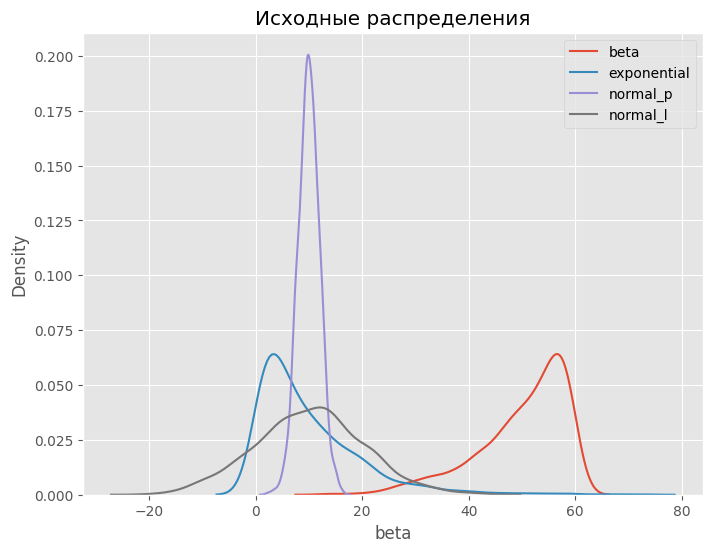

In [860]:
# Зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(8, 6))
ax1.set_title('Исходные распределения')

# Kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

Признаки распределены по-разному: смещены влево, вправо, присутствуют отрицательные величины. Попробуем нормализовать их.

Зафиксируем описательные статистики до преобразований.

In [861]:
# Получаем описательную статистику
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


Для нормализации данных мы будем использовать уже знакомую нам библиотеку **sklearn.**

* **MINMAXSCALER**

При применении нормализации методом **MinMaxScaler** все значения признаков будут преобразованы в диапазон **[0, 1],** что означает, что минимальное и максимальное значение признака будет равно **0** и **1** соответственно.

*Нормализация происходит следующим способом:*

**1.** Из каждого значения признака **х** вычитается минимальное значение этого признака: $x-min$

**2.** Результат вычитания делится на разность между максимумом и минимумом признака: $max - min$

<img src="images/MinMaxScaler.png">

Проведём нормализацию распределений признаков из обучающего примера.

Класс **MinMaxScaler** делает вышеописанную нормализацию автоматически при помощи функции преобразования **fit_transform.** Познакомиться с ней подробнее можно в модулях машинного обучения.

<Axes: title={'center': 'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

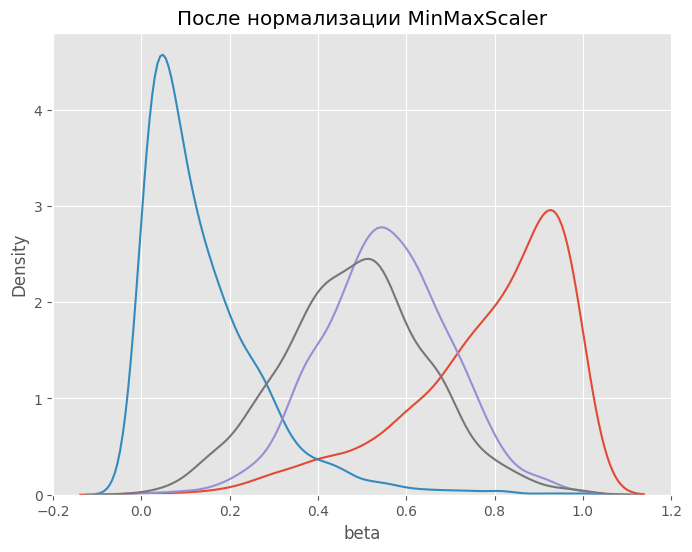

In [862]:
# Инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# Кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(8, 6))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

In [863]:
# Получаем описательную статистику
df_mm.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.783981,0.140471,0.551120,0.482297
std,0.183684,0.136450,0.145334,0.163992
min,0.000000,0.000000,0.000000,0.000000
25%,0.692276,0.041266,0.456837,0.375032
50%,0.834120,0.098280,0.550362,0.484741
75%,0.929157,0.196461,0.645864,0.586810
max,1.000000,1.000000,1.000000,1.000000


Как мы видим, значения расположились в диапазоне от минимального *0* до максимального *1*, как и должно произойти при таком способе нормализации. Также сохранилась форма исходного распределения: *скошенные влево/вправо распределения сохранили свою форму*.

Теперь рассмотрим нормализацию методом **RobustScaler,** а затем сравним их.

* **ROBUSTSCALER**

Нормализация методом **RobustScaler** происходит в несколько этапов:

<img src="images/RobustScaler.png">

Проведём нормализацию распределений признаков из обучающего примера, используя класс **RobustScaler.**

<Axes: title={'center': 'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

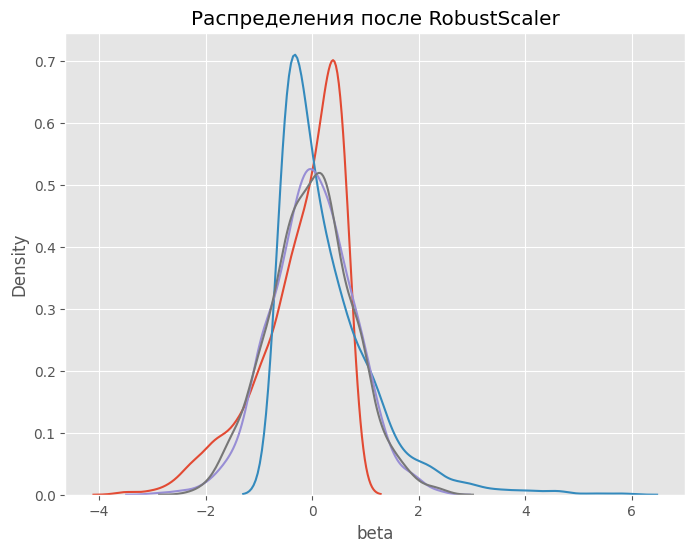

In [864]:
# Инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# Кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(8, 6))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

In [865]:
# Получаем описательную статистику
df_r.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,-2.116639e-01,2.718638e-01,4.011529e-03,-0.011541
std,7.754247e-01,8.792225e-01,7.688570e-01,0.774358
min,-3.521256e+00,-6.332678e-01,-2.911564e+00,-2.288916
25%,-5.987992e-01,-3.673671e-01,-4.947706e-01,-0.518040
50%,3.252607e-16,-4.011548e-17,3.390842e-16,0.000000
75%,4.012008e-01,6.326329e-01,5.052294e-01,0.481960
max,7.002654e-01,5.810261e+00,2.378706e+00,2.433017


Из описательных статистик видно, что **RobustScaler** не масштабирует данные в заданный интервал, как делает это **MinMaxScaler.** Однако распределения не сохранили своё исходное состояние. Левый хвост экспоненциального распределения стал практически незаметным. То же произошло и с бета-распределением. Они стали более нормальными.

**В ЧЁМ РАЗНИЦА ?**

Поскольку **MinMaxScaler** использует в своём вычислении *минимальное* и *максимальное* значения признака, то этот способ будет чувствителен к наличию выбросов в распределении.

**RobustScaler** в вычислении использует перцентили, и поэтому не зависит даже от большого количества выбросов.

Поэтому, если наши данные уже были очищены от выбросов, смело будем использовать **MinMaxScaler.** Этот алгоритм нормализации используется специалистами по данным чаще всего в силу его простоты и понятности, а данные на этом этапе чаще всего уже очищены. Если мы пропустим этап очистки данных и нормализуем признаки раньше, то тогда будем использовать нормализатор **RobustScaler.**

**2. СТАНДАРТИЗАЦИЯ**

**Стандартизация -** ещё один метод преобразования входных признаков, при котором изменяется распределение таким образом, чтобы среднее значений равнялось **0,** а стандартное отклонение **- 1.**

<img src="images/Стандартизация.png">

Этот процесс можно описать как **центрирование данных с масштабированием.** Сначала происходит вычитание среднего значения из всех данных - центрирование, а затем деление на отклонение. 

**ДЛЯ ЧЕГО НЕОБХОДИМО ТАКОЕ ПРЕОБРАЗОВАНИЕ ?**

Как и нормализация, стандартизация может быть полезна при данных с разными масштабами. Однако в отличие от нормализации стандартизация предполагает, что признак распределён нормально.

Чтобы понять, как стандартизация меняет распределение, рассмотрим метод стандартизации **StandardScaler** в *Python*.

Продолжим использовать обучающий пример, сгенерированный нами при изучении нормализации данных. Стандартизируем признаки в исходном наборе данных.

**STANDARDSCALER**

Для стандартизации используем класс **StandardScaler.**

<Axes: title={'center': 'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

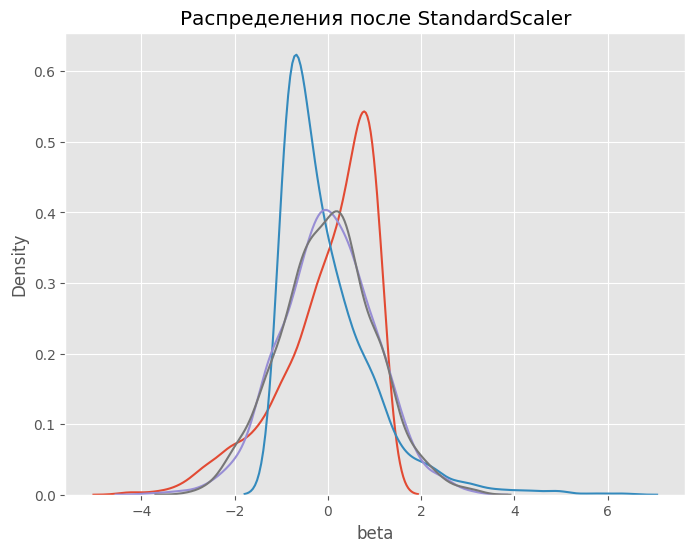

In [866]:
# Инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# Кодируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(8, 6))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

In [867]:
# Получаем описательную статистику
df_s.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.075140e-16,-1.776357e-18,8.100187e-16,-2.398082e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.270238e+00,-1.029983e+00,-3.793988e+00,-2.942457e+00
25%,-4.995057e-01,-7.274049e-01,-6.490566e-01,-6.544169e-01
50%,2.731017e-01,-3.093641e-01,-5.220134e-03,1.491105e-02
75%,7.907555e-01,4.105327e-01,6.522262e-01,6.376219e-01
max,1.176627e+00,6.302351e+00,3.090149e+00,3.158464e+00


Стандартное отклонение стало равным **1,** а средние значения **- 0.** Распределения изменились подобно **RobustScaler -** стали более нормальными.

О нормальном распределении мы говорили в юните про корреляцию.

**НОРМАЛИЗОВАТЬ ИЛИ СТАНДАРТИЗИРОВАТЬ ?**

Так как нормализация и стандартизация преследуют одни и те же цели, возникают вопросы:

*Когда признаки необходимо нормализовать, а когда стандартизировать? Какой способ нормализации выбрать?*

Преобразование входных переменных и выбор способа преобразования зависит от конкретной задачи и данных - заранее невозможно узнать, какое преобразования будет лучше. 

**Однако мы составили небольшую инструкцию по преобразованию признаков:**

* если признак распределён нормально, то его необходимо **стандартизировать;**
* если признак распределён ненормально, его необходимо **нормализовать;**
* если разброс значений небольшой, то можно обойтись **без преобразования данных.**

Выбор определённого способа преобразования и его необходимости может быть нелёгкой задачей, поэтому необходимо пробовать делать различные преобразования и оценивать результаты на конкретной модели, необходимо смотреть, есть ли разница в улучшении качества модели. О том, как сравнивать модели, мы узнаем далее в курсе в модулях про машинное обучение.

*Итак, что лучше ? Нормализовать, а потом стандартизировать или наоборот ?*

Комбинации преобразований также могут быть эффективны. Поэтому можно проводить эксперименты над моделью и выбирайте то сочетание преобразований, которые обеспечивают лучший результат на наших данных.

Для закрепления пройденного материала выполните следующие задания.

**20.** **Преобразование признаков -** это …

* *процесс, направленный на масштабирование и изменение распределения в данных*.

**Пояснение:** Преобразование признаков включает в себя не только нормализацию и стандартизацию, а, например, логарифмирование, взятие корня из распределения и так далее. Это действия, направленные на изменение распределения в данных и их масштабирование.

**21.** Неободимо выбрать верные утверждения о нормализации данных:

* *после нормализации значения данных приводятся к заранее установленному диапазону, например, к диапазону от 0 до 1*.
* *нормализация может улучшить качество модели*.

**Пояснение:** После нормализации данных значения становятся распределены в диапазоне 0-1 или в другом заданном диапазоне. Это преобразование может улучшить результаты модели. Нормализация не приводит стандартное отклонение к 1, это делает стандартизация.

**22.** Необходимо выбрать верные утверждения о стандартизации данных:

* *После стандартизации среднее значение данных становится равным 0*.
* *После стандартизации стандартное отклонение равно 1*.
* *Стандартизация может улучшить качество модели*.

**Пояснение:** Стандартизация изменяет значения признаков таким образом, чтобы среднее значений равнялось 0, а стандартное отклонение - 1. Это действия, направленные на изменение распределения в данных и их масштабирование.

**23.** Нормализуем признак **price.** Выберем подходящий тип нормализации, учитывая тот факт, что в данных присутствуют вина с выбросной стоимостью. В ответе напишем результат выполнения кода **data["price"].sum(),** округлённый до целого.

In [868]:
# Инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# Кодируем исходный датасет
df_r = r_scaler.fit_transform(df_wine_cleared_1[["price"]], y=None)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=["price"])

print(round(df_r["price"].sum()))

43501


**24.** Стандартизируем исходный признак **price.** В ответе напишем результат выполнения кода **data["price"][129968].** Ответ округлим до сотых.

In [869]:
# Инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# Кодируем исходный датасет
df_s = s_scaler.fit_transform(df_wine_cleared_1[["price"]], y=None)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=["price"])

print(round(df_s["price"][129968], 2))

-0.14


В этом юните мы рассмотрели основные преобразования в данных и научились применять их к признакам в наборе данных. В следующем юните мы узнаем про отбор признаков и мультиколлинеарность.

#### **VII. Отбор признаков. Мультиколлинеарность**

Ещё одним важным этапом в жизненном цикле машинного обучения и в проектировании признаков является **отбор признаков.**

**Отбор признаков -** процесс выбора важных признаков, наиболее влияющих на предсказание.

*Например*, если бы мы делали отбор признаков для задачи сомелье винных обзоров, мы бы отобрали те признаки, что больше всего влияют на рейтинг вина.

**ДЛЯ ЧЕГО НЕОБХОДИМО ОТБИРАТЬ ПРИЗНАКИ ?**

**Отбор признаков помогает:**

* **1.** **Сократить время обучения.** Чем меньше данных, тем быстрее обучается модель. *Например*, в скоринговых моделях часто количество признаков на этапе проектирования составляет больше *500*, и дата-сайентисты делают отбор признаков, чтобы исключить те признаки, которые вносят наименьший вклад. В редких случаях количество признаков в модели может быть больше *100*.

* **2.** **Повысить качество предсказания.** Избыточные данные могут снижать точность предсказания, могут выступать в качестве «шума». Это явление называют **мультиколлинеарностью,** которую мы изучим ниже. Мы уже говорили о «проклятии размерности» в юните *Работа с пропусками: методы обработки*.

**КАК ПОНЯТЬ, КАКИЕ ПРИЗНАКИ БОЛЬШЕ ВСЕГО ВЛИЯЮТ НА ПРЕДСКАЗАНИЕ ?**

Существует множество методов для отбора признаков. Однако для их использования необходимо понимать такие понятия, как **значимость, критерий значимости, гипотеза.** С этими понятиями мы познакомимся в следующем модуле про выдвижение гипотез. 

Однако есть и ещё один способ отобрать признаки для обучения **- корреляция,** которую вы изучили в модуле *EDA-2. Математическая статистика в контексте EDA Юнит 3. Корреляция.*

В этом юните мы рассмотрим такое понятие, как **мультиколлинеарность** и её связь с отбором признаков.

**Мультиколлинеарность -** сильная корреляционная связь между признаками, отбираемыми для обучения. 

Сильно скоррелированные признаки сообщают для модели одну и ту же информацию. Поэтому для обучения не нужно использовать их все. Часть из них необходимо удалить из набора данных. 

Некоторые модели плохо работают на данных с мультиколлинеарностью. Мы узнаем об этом позже в модулях про машинное обучение.

Процесс корреляционного анализа и удаление сильно скоррелированных признаков относят к одному из методов отбора признаков.

Рассмотрим отбор признаков в *Python*. Для этого воспользуемся обучающим датасетом о цветках ириса.

Данные содержат *150* экземпляров ириса, по *50* экземпляров трех видов - *Ирис щетинистый (Iris setosa)*, *Ирис виргинский (Iris virginica)* и *Ирис разноцветный (Iris versicolor)*. Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

* **sepal length -** *длина наружной доли околоцветника*;
* **sepal width -** *ширина наружной доли околоцветника*;
* **petal length -** *длина внутренней доли околоцветника*;
* **petal width -** *ширина внутренней доли околоцветника*.

На основании этого набора данных требуется построить модель, определяющую вид растения по данным измерений. 

Прочитаем датасет и посмотрим на первые несколько строк.

In [870]:
import pandas as pd

df_iris = pd.read_csv('data/iris.csv')
df_iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Будем исследовать признаки, которые могут влиять на *variety - sepal.length, sepal.width, petal.length, petal.width*.

Проведём корреляционный анализ датасета и используем для этого тепловую карту корреляций признаков.

<Axes: >

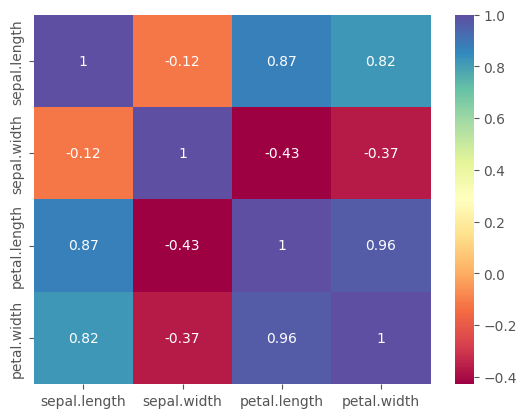

In [871]:
# Импортируем Seaborn для построения графиков
import seaborn as sns

# Отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(df_iris.corr(numeric_only=True), annot=True, cmap="Spectral")

Итак, мы получили тепловую карту для признаков, чтобы построить модель на этом наборе данных, сделаем отбор признаков - удалим признаки с очень сильной корреляцией (где коэффициент корреляции *+/-0.7 и выше*), но перед этим выполним следующее задание:

**25.** Проанализируем тепловую карту корреляций и ответим на вопрос. Какие пары признаков датасета имеют сильную или очень сильную связь ?

* *sepal.length* и *petal.width*
* *petal.length* и *sepal.length*
* *petal.width* и *petal.length*

**Пояснение:** Выбираем из матрицы корреляций пары с признаков с корреляцией *+/-0.7 и выше*, это признаки: *sepal.length* и *petal.width*, *petal.length* и *sepal.length*, *petal.width* и *petal.length*.

Как мы выяснили из тепловой карты корреляций, у нас есть три пары сильно скоррелированных признаков: *sepal.length* и *petal.width*, *petal.length* и *sepal.length*, *petal.width* и *petal.length*.

Начнём с самого высокого коэффициента корреляции в паре признаков: *petal.width* и *petal.length* **- 0,96.** Удалим любой признак из этой пары, например *petal.width*, так как он коррелирует ещё и с признаком *sepal.length*:

In [872]:
df_iris = df_iris.drop(["petal.width"], axis=1)
df_iris

,sepal.length,sepal.width,petal.length,variety
0,5.1,3.5,1.4,Setosa
1,4.9,3.0,1.4,Setosa
2,4.7,3.2,1.3,Setosa
3,4.6,3.1,1.5,Setosa
4,5.0,3.6,1.4,Setosa
...,...,...,...,...
145,6.7,3.0,5.2,Virginica
146,6.3,2.5,5.0,Virginica
147,6.5,3.0,5.2,Virginica
148,6.2,3.4,5.4,Virginica


Однако второй признак *petal.length* из этой пары также сильно коррелирует с признаком *sepal.length*. Удалим и его:

In [873]:
df_iris = df_iris.drop(["petal.length"], axis=1)
df_iris

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa
...,...,...,...
145,6.7,3.0,Virginica
146,6.3,2.5,Virginica
147,6.5,3.0,Virginica
148,6.2,3.4,Virginica


Посмотрим на результат:

In [874]:
df_iris.head()

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa


У нас осталось всего два признака с коэффициентом корреляции **-0.12:** *sepal.width* и *sepal.length*, и признак, который необходимо предсказать **- variety.** Связь между оставшимися признаками очень слабая, поэтому эти признаки будут включены в итоговый набор данных для обучения.

Это означает, что всего два признака - *sepal length* (длина наружной доли околоцветника) и *sepal width* (ширина наружной доли околоцветника) сообщают модели то же самое, что и исходный набор признаков. Мы уменьшили количество признаков, не потеряв при этом информацию о данных. А признаки *petal length* (длина внутренней доли околоцветника) и *petal width* (ширина внутренней доли околоцветник) сообщают лишнюю информацию для модели. Значит, они не нужны для построения модели.

*Таким образом*, анализ мультиколлинеарности и исключение сильно скоррелированных признаков помогает отобрать признаки для модели, уменьшить количество признаков, исключить повторяющуюся информацию.

**КАКОЙ ПРИЗНАК УДАЛЯТЬ ?**

*Как понять, какой признак необходимо удалить из пары скоррелированных признаков ?*

Мы можем удалить любой признак из пары. Однако мы можем оставить в наборе данных тот признак, который легче будет использовать в дальнейшем. *Например*, для него не понадобится округление или нормализация. 

<img src="images/Sepal.length.round.png">

Корреляция между исходным признаком *sepal.length* и новым признаком *sepal.length.round* составила **0.94.** При отборе признаков один из них необходимо удалить. В этом случае лучше выбрать *sepal.length.round*, так как с целым числом удобнее работать.

Подобные критерии для удаления мы можем выбирать самостоятельно для удобства работы с признаками.

Выполним следующие задания для закрепления пройденного материала.

**26.** **Отбор признаков -** это …

* *процесс выбора самых важных признаков*

**Пояснение:** При отборе признаков действительно удаляются данные, но главная цель этого этапа - отбор самых важных признаков. Новые признаки создаются на этапе создания признаков, а самые скоррелированные, наоборот, удаляются из датасета.

После проектирования признаков в нашем наборе данных для задачи винного сомелье появилось много новых данных. 

**27.** Какие из признаков имеют самую сильную корреляционную связь ?

* *price* и *price_round*

**Пояснение:** Построим матрицу корреляций **data.corr()** и выберем признак с самой высокой корреляцией, это - *price* и *price_round*.

In [875]:
# Построим матрицу корреляций
df_wine_cleared_1.corr(numeric_only=True)

,Unnamed: 0,points,price,price_round,is_usa,is_france,is_italy,old_wine,area_country,years_diff,...,country_1,country_2,country_3,country_4,country_5,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
Unnamed: 0,1.000000,0.007124,0.004652,0.004666,0.010936,-0.002183,-0.010174,-0.020671,0.011765,-0.016943,...,0.003142,-0.001257,-0.001583,0.010791,0.001573,-0.001707,0.012215,-0.001292,-0.000417,0.003693
points,0.007124,1.000000,0.402137,0.402065,0.032594,0.059249,0.015927,-0.046071,0.023426,-0.034794,...,-0.019353,-0.035263,-0.019866,0.032217,0.059090,-0.001372,0.050513,-0.140646,0.183249,0.030897
price,0.004652,0.402137,1.000000,0.999997,0.025870,0.053138,0.039564,0.055676,0.021450,0.052738,...,-0.018989,-0.070150,0.002666,-0.016745,0.085674,-0.001035,-0.051187,-0.022779,0.058049,-0.056473
price_round,0.004666,0.402065,0.999997,1.000000,0.026376,0.052614,0.039312,0.055573,0.021988,0.052655,...,-0.018946,-0.070108,0.002362,-0.016291,0.085652,-0.001031,-0.051017,-0.022450,0.057804,-0.056185
is_usa,0.010936,0.032594,0.025870,0.026376,1.000000,-0.384589,-0.357481,-0.007432,0.966564,-0.004994,...,-0.080997,-0.302504,-0.542771,0.758888,0.412012,0.005700,0.012357,0.256756,0.000421,-0.042804
is_france,-0.002183,0.059249,0.053138,0.052614,-0.384589,1.000000,-0.190361,-0.082787,-0.398447,-0.066336,...,-0.043131,-0.161086,0.708565,-0.506779,0.219399,-0.003075,-0.030370,-0.424675,0.446006,-0.300872
is_italy,-0.010174,0.015927,0.039564,0.039312,-0.357481,-0.190361,1.000000,0.085616,-0.393992,0.081177,...,-0.040091,-0.149731,-0.268657,-0.471059,0.203934,-0.002858,-0.184383,-0.059158,-0.386535,0.142946
old_wine,-0.020671,-0.046071,0.055676,0.055573,-0.007432,-0.082787,0.085616,1.000000,0.007451,0.502451,...,-0.015373,0.034257,-0.056202,-0.036547,0.030231,0.002861,-0.106631,0.196978,-0.159977,-0.169839
area_country,0.011765,0.023426,0.021450,0.021988,0.966564,-0.398447,-0.393992,0.007451,1.000000,0.002226,...,-0.029340,-0.220488,-0.534238,0.742529,0.434797,0.007289,0.063911,0.255081,0.011291,-0.042338
years_diff,-0.016943,-0.034794,0.052738,0.052655,-0.004994,-0.066336,0.081177,0.502451,0.002226,1.000000,...,-0.007454,0.009688,-0.049159,-0.034976,0.025418,0.004775,-0.080622,0.129205,-0.126544,-0.105693


**28.** Проведем корреляционный анализ всего набора данных и отберем только необходимые признаки для предсказания рейтинга вина.

❗️ Удалять признак рейтинг - *points* нельзя !

❗️ Для простоты вычислений можно использовать только корреляцию Пирсона.

<Axes: >

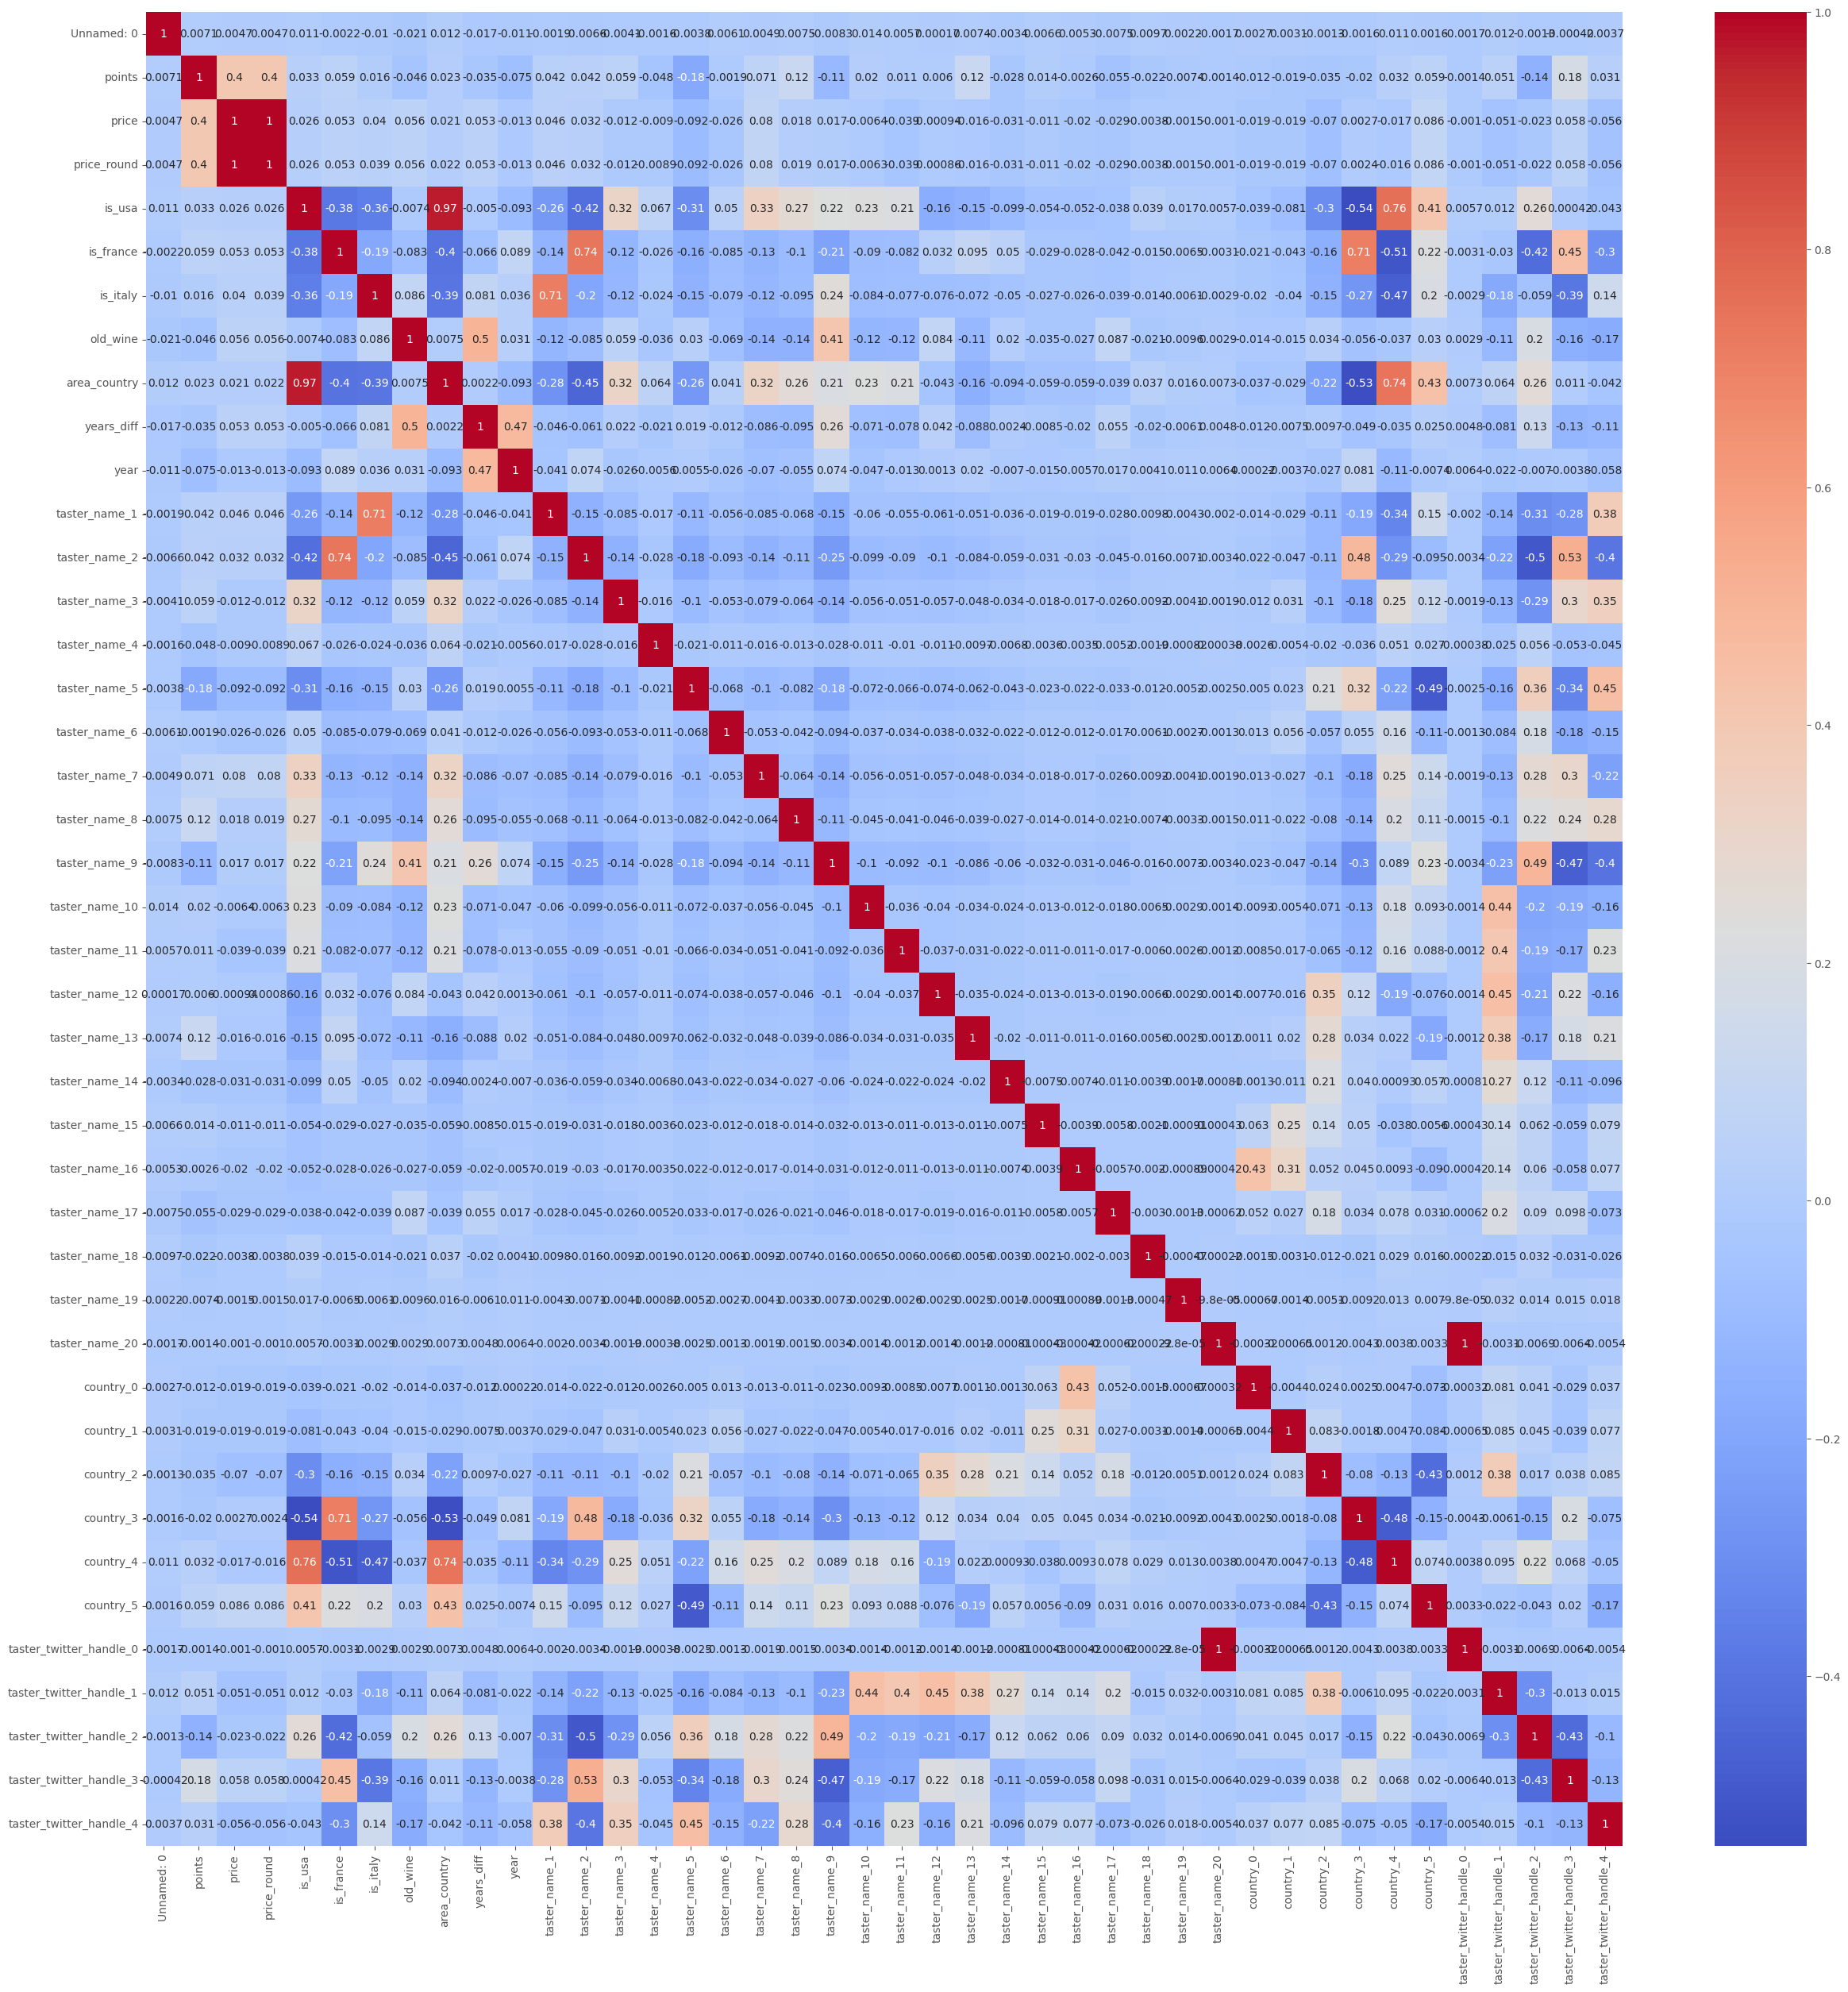

In [876]:
# Построим график корреляции всех величин, для простоты воспользуемся корреляцией Пирсона.
fig, ax = plt.subplots(figsize=(30, 30))
# Отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(df_wine_cleared_1.corr(numeric_only=True), annot=True, cmap="coolwarm")

<Axes: >

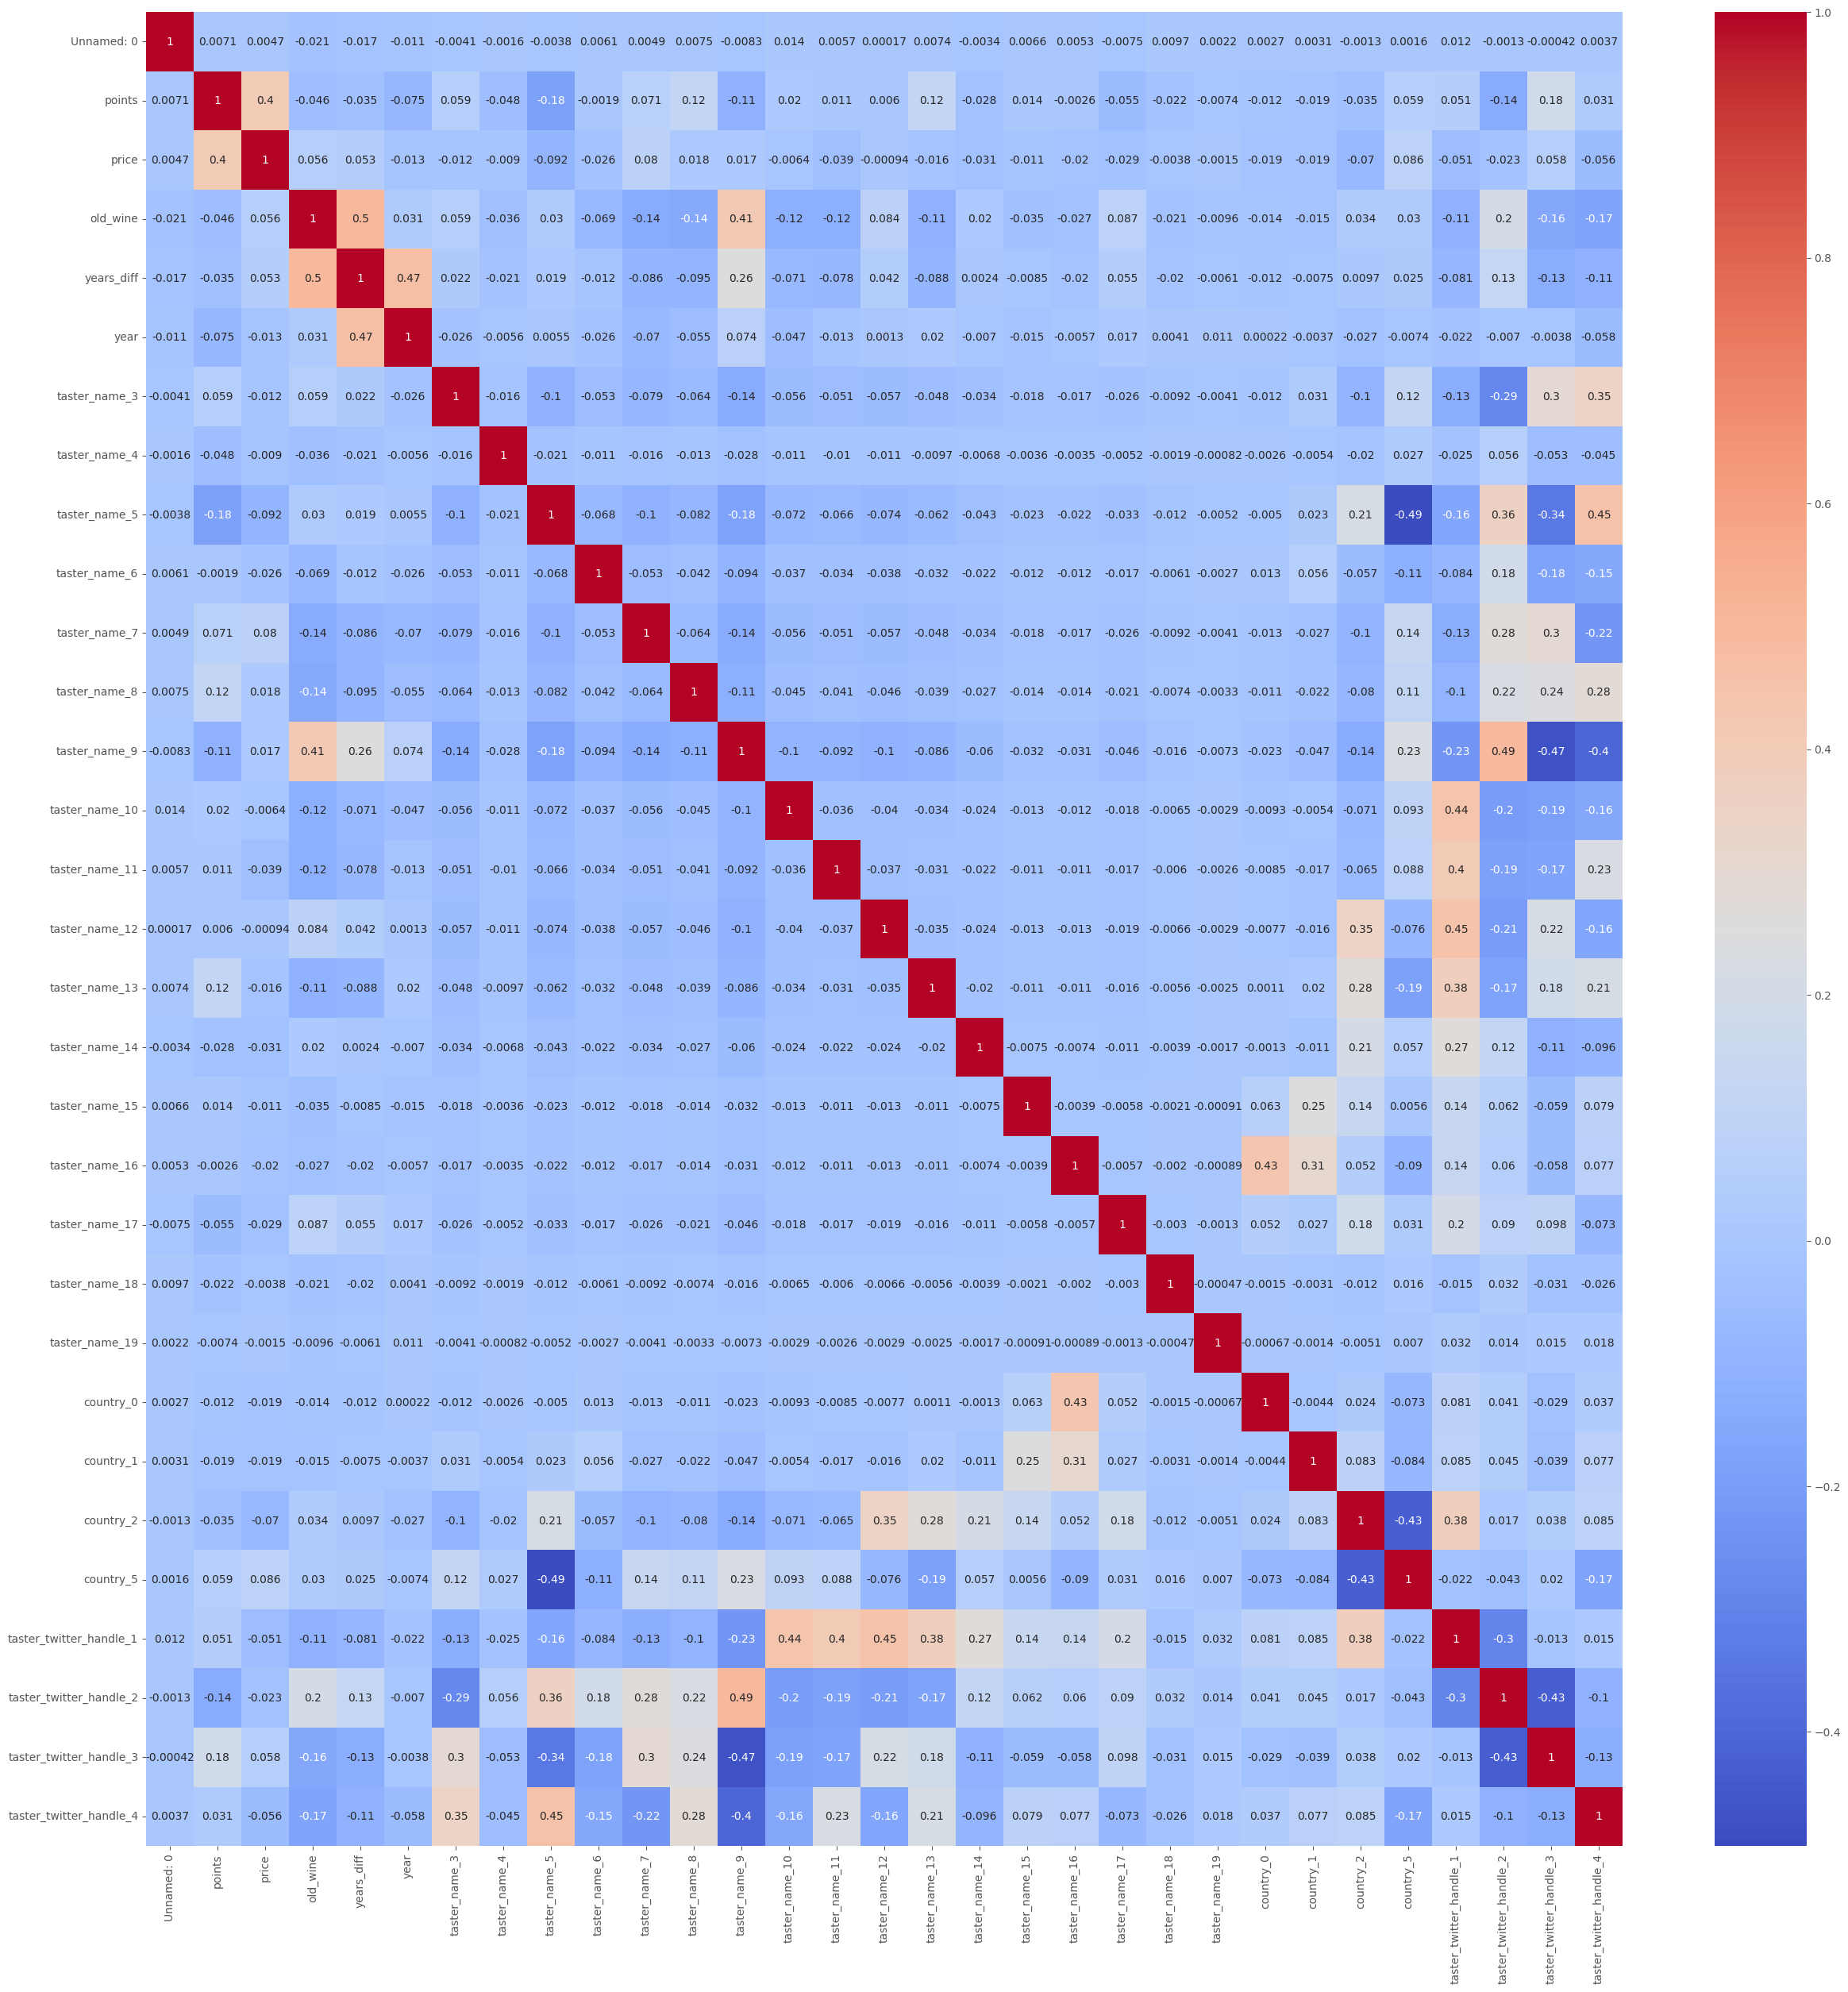

In [877]:
# Удалим самые сильно скоррелированные пары
df_wine_cleared_1 = df_wine_cleared_1.drop(["price_round"], axis=1)
df_wine_cleared_1 = df_wine_cleared_1.drop(["is_usa"], axis=1)
df_wine_cleared_1 = df_wine_cleared_1.drop(["is_france"], axis=1)
df_wine_cleared_1 = df_wine_cleared_1.drop(["is_italy"], axis=1)
df_wine_cleared_1 = df_wine_cleared_1.drop(["area_country"], axis=1)
df_wine_cleared_1 = df_wine_cleared_1.drop(["taster_name_1"], axis=1)
df_wine_cleared_1 = df_wine_cleared_1.drop(["taster_name_2"], axis=1)
df_wine_cleared_1 = df_wine_cleared_1.drop(["taster_name_20"], axis=1)
df_wine_cleared_1 = df_wine_cleared_1.drop(["country_3"], axis=1)
df_wine_cleared_1 = df_wine_cleared_1.drop(["country_4"], axis=1)
df_wine_cleared_1 = df_wine_cleared_1.drop(["taster_twitter_handle_0"], axis=1)
# Построим график корреляции всех величин
fig, ax = plt.subplots(figsize=(30, 30))
# Проверяем, что сильно скоррелированных признаков не осталось
sns.heatmap(df_wine_cleared_1.corr(numeric_only=True), annot=True, cmap="coolwarm")

Итак, в этом юните мы узнали, что такое отбор признаков и мультиколлинеарность, а также научились отбирать признаки путём исключения сильно скоррелированных признаков для дальнейшего построения модели. В следующем юните мы закрепим знания из юнитов проектирования признаков на практической задаче.